In [101]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [73]:
# Reading the data
df = pd.read_csv('data/movie_metadata.csv')

In [74]:
# EDA
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [76]:
# Analyzing top 5 rows
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [77]:
# Exploring numerical and categorical data
df_categorical = df.select_dtypes(include = ['object'])
df_numerical = df.select_dtypes(exclude = ['object'])

categorical_cols = df_categorical.columns
numerical_cols = df_numerical.columns

print('Categorical cols: ', categorical_cols)
print('Numberical cols: ', numerical_cols)
pd.options.mode.chained_assignment = None

Categorical cols:  Index(['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
       'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link',
       'language', 'country', 'content_rating'],
      dtype='object')
Numberical cols:  Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')


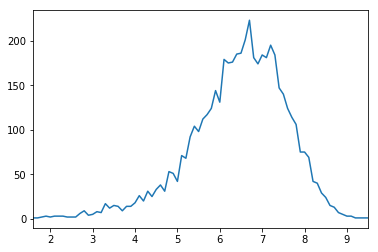

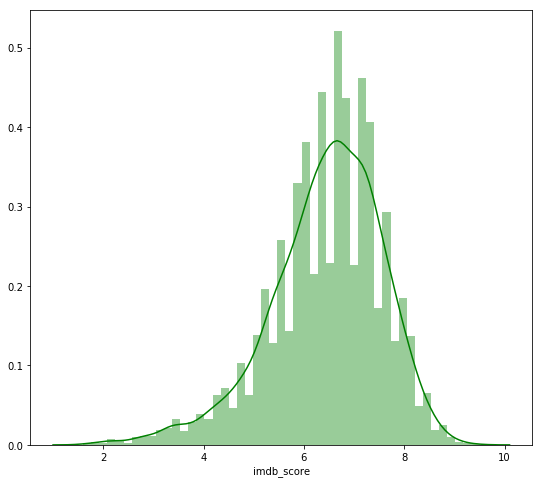

In [78]:
# Analyzing dependent variable i.e. imdb_score
df['imdb_score'].value_counts().sort_index().plot()
plt.figure(figsize = (9, 8))
sns.distplot(df['imdb_score'], color = 'g')
plt.show()

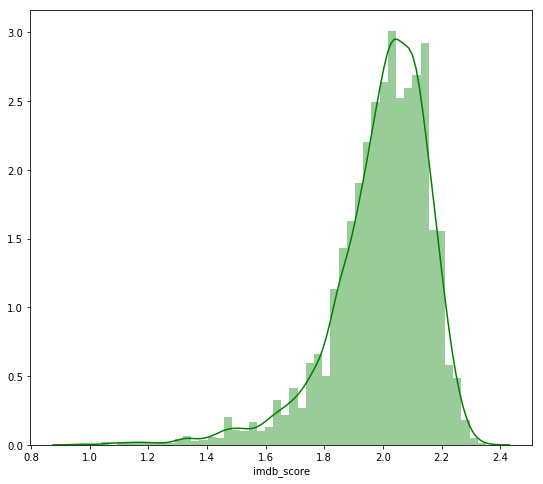

In [79]:
# Visualizing dependent variable after normal distribution
plt.figure(figsize = (9, 8))
sns.distplot(np.log1p(df['imdb_score']), color = 'g')
plt.show()

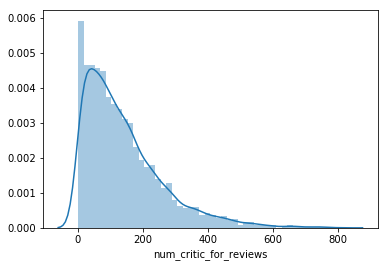

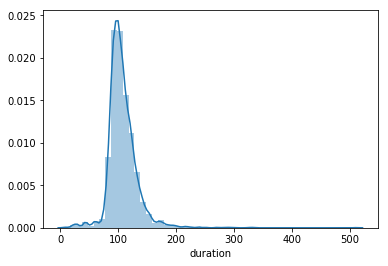

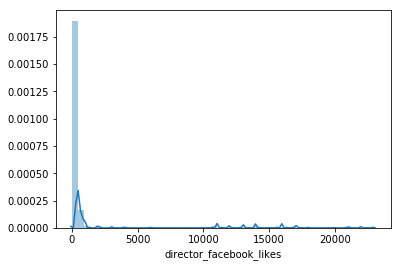

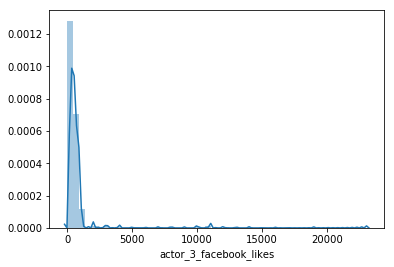

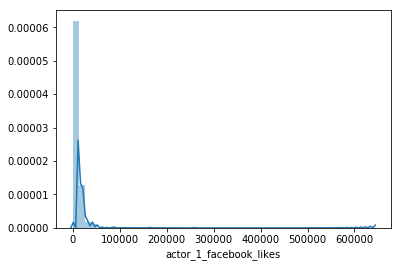

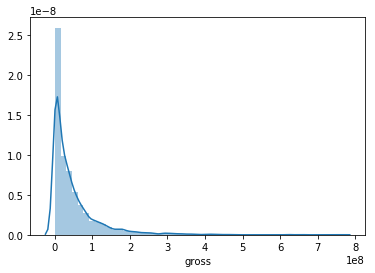

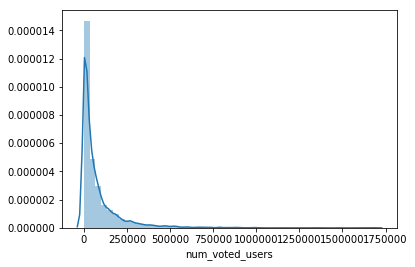

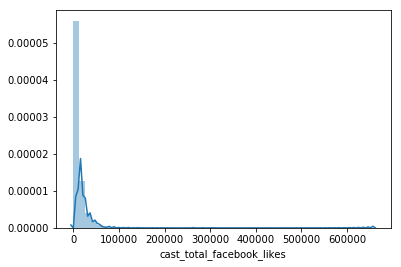

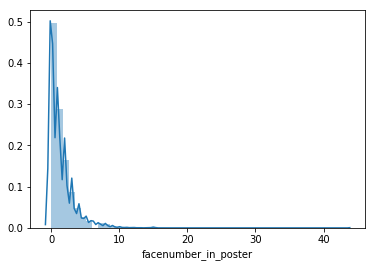

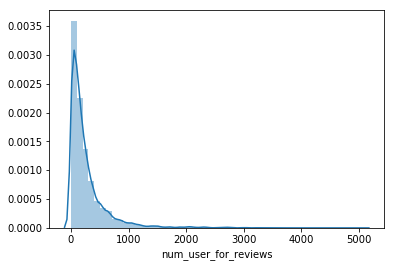

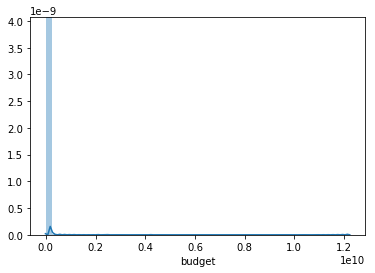

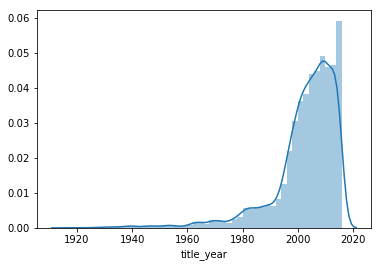

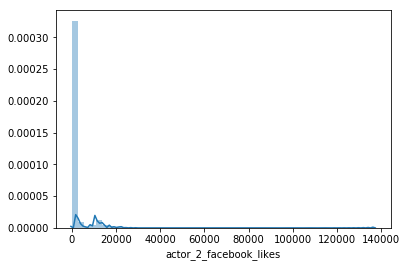

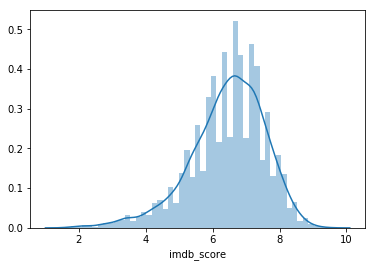

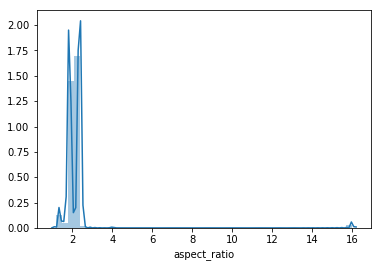

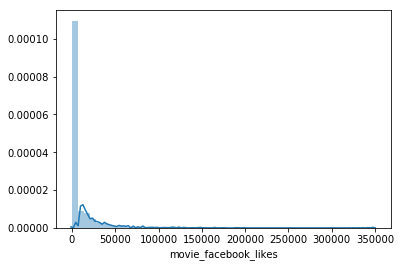

In [80]:
# Analyzing every numerical variables
for index in range(len(numerical_cols)):
    numerical_col = numerical_cols[index]
    # Only plot whose value is not nan or empty
    sns.distplot(df_numerical[~df_numerical[numerical_col].isnull()][numerical_col])
    plt.show()

In [81]:
# Checking null values in numerical variables
if(df_numerical.isnull().values.any()):
    for index in range (len(numerical_cols)):
        numerical_col = numerical_cols[index]
        if(df_numerical[numerical_col].isnull().values.any()):
            df_numerical[numerical_col].fillna((df_numerical[numerical_col].mean()), inplace = True)

In [82]:
# Checking null values in categorical variables
if(df_categorical.isnull().values.any()):
    for index in range (len(categorical_cols)):
        categorial_col = categorical_cols[index]
        if(df_categorical[categorial_col].isnull().values.any()):
            df_categorical[categorial_col].fillna(' ', inplace = True)

In [83]:
# Finding co-relation between numerical and dependent variable
df_numerical_corr = df_numerical.corr()['imdb_score'][:-3]
golden_features_list = df_numerical_corr[abs(df_numerical_corr) > 0.25].sort_values(ascending=False)
print("There are {} strongly correlated values with Imdb Rating:\n{}".format(len(golden_features_list), golden_features_list))

There are 4 strongly correlated values with Imdb Rating:
num_voted_users           0.410965
num_critic_for_reviews    0.302808
num_user_for_reviews      0.291472
duration                  0.260886
Name: imdb_score, dtype: float64


In [84]:
# Keeping only features whose co-related is greater than 25%
df_numerical_golden = pd.DataFrame(data = df_numerical,columns=['num_voted_users', 'num_critic_for_reviews', 
                                                               'num_user_for_reviews', 'duration'])

In [85]:
# Create one hot encoder for genres and plot_keywords
genres_one_hot = pd.Series(df_categorical['genres']).str.get_dummies()
plot_keywords_one_hot = pd.Series(df_categorical['plot_keywords']).str.get_dummies()

In [86]:
# Dropping genres and plot_keywords cols
df_categorical = df_categorical.drop(['genres', 'plot_keywords'], axis = 1)

In [87]:
# Converting categorical features into numerical
df_categorical_one_hot = pd.get_dummies(df_categorical, drop_first=True)

In [88]:
# Creating final data frame by combining numerical and categorical data
df_final = pd.concat([df_numerical_golden, df_categorical_one_hot] ,axis=1)

In [89]:
X = df_final.iloc[:, 0:].values

In [90]:
y = df_numerical['imdb_score']

In [91]:
# Spliting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [92]:
# Fitting Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [93]:
y_pred_lr = regressor.predict(X_test)

In [94]:
# Metrics to calculate Linear Regression Performance
mse_score_lr = mean_squared_error(y_test, y_pred_lr)
r2_score_lr = r2_score(y_test, y_pred_lr)

In [95]:
print(mse_score_lr, r2_score_lr)

13.7456011611 -10.1147712019


In [96]:
# Fitting Decision Tree Regression
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [97]:
y_pred_dt = regressor.predict(X_test)

In [98]:
# Metrics to calculate Decision Tree Performance
mse_score_dt = mean_squared_error(y_test, y_pred_dt)
r2_score_dt = r2_score(y_test, y_pred_dt)

In [99]:
print(mse_score_dt, r2_score_dt)

1.16755203171 0.0559107930771


In [116]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [117]:
y_pred_rf = regressor.predict(X_test)

In [118]:
# Metrics to calculate Decision Tree Performance
mse_score_rf = mean_squared_error(y_test, y_pred_rf)
r2_score_rf = r2_score(y_test, y_pred_rf)

In [119]:
print(mse_score_rf, r2_score_rf)

0.770759068385 0.37675983782
